<h4>Librerias</h4>

1. Definir las librerias a utilizar en el modelo.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
from io import StringIO
import csv
import matplotlib.pyplot as plt

In [2]:
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [3]:
from tqdm import tqdm

In [4]:
font = {
  'family':'serif',
  'color': 'Green',
  'weight':'bold',
  'size':35
}
font_title = {
  'family':'serif',
  'color':  'black',
  'weight':'normal',
  'size':30
}

fontLabel = {
  'family':'serif',
  'color': 'black',
  'weight':'normal',
  'size':20
}

fontPie = {
  'family':'serif',
  'color': 'black',
  'weight':'bold',
  'size':16
}

fontLabel_bar = {
  'family':'serif',
  'color': 'black',
  'weight':'bold',
  'size':20
}

<h4>Rutas de Acceso al Dataset</h4>

2. Rutas de Accesos a los datos en para el modelo.

In [5]:
route_movies = "Datasets/ml-1m/movies.dat"
route_ratings = "Datasets/ml-1m/ratings.dat"
route_users = "Datasets/ml-1m/users.dat"

In [6]:
#data_movies = [i.strip().split() for i in open(route).readlines()]

In [7]:
#from google.colab import drive
#drive.mount('/content/drive')

In [8]:
#route_movies = "/content/drive/MyDrive/Dataset_practicas/movies.dat"
#route_ratings = "/content/drive/MyDrive/Dataset_practicas/ratings.dat"
#route_users = "/content/drive/MyDrive/Dataset_practicas/users.dat"

In [9]:
data_movies= pd.read_csv(route_movies,header=None,sep="::",engine="python",encoding='latin-1')
data_user=pd.read_csv(route_users,sep="::",header=None, engine="python",encoding='latin-1')
data_ratings=pd.read_csv(route_ratings,sep="::",header=None,engine="python",encoding='latin-1')

<h4>Acceso a los Datos</h4>

3. En el acceso a los datos se encuentran 3 tablas relacionales de datos estructurados
*OBJETIVO DE VALOR*
* Se propone la unión de tablas para obtener una relación total de datos que permitan ver la calidad y cantidad de los datos.

4. Revisar datos de las tablas y obtener un patron de relación para la unión
*OBJETIVO DE VALOR*
* Revisar los datos y su estructura 
* Hallar datos nulos

In [10]:
data_ratings

,0,1,2,3
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291
...,...,...,...,...
1000204,6040,1091,1,956716541
1000205,6040,1094,5,956704887
1000206,6040,562,5,956704746
1000207,6040,1096,4,956715648


In [11]:
data_ratings.isnull().sum()

0    0
1    0
2    0
3    0
dtype: int64

In [12]:
len(data_ratings)

1000209

In [13]:
data_user

,0,1,2,3,4
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455
...,...,...,...,...,...
6035,6036,F,25,15,32603
6036,6037,F,45,1,76006
6037,6038,F,56,1,14706
6038,6039,F,45,0,01060


In [14]:
data_user.isnull().sum()

0    0
1    0
2    0
3    0
4    0
dtype: int64

In [15]:
data_movies

,0,1,2
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy
...,...,...,...
3878,3948,Meet the Parents (2000),Comedy
3879,3949,Requiem for a Dream (2000),Drama
3880,3950,Tigerland (2000),Drama
3881,3951,Two Family House (2000),Drama


In [16]:
data_movies.isnull().sum()

0    0
1    0
2    0
dtype: int64

**CONCLUSIONES PRIMER CHECKEO DE DATOS**
* No se encuentran datos nulos, es un dataset muy limpio. En caso tal de que se hallasen datos nulos se procede a hallar valores que tengan relación con los datos de la columna para poder reemplazar dicho valor nulo. Se pueden utilizar técnicas de aproximaciones o eliminar la columna o fila pertinente (esto varia dependiendo de la importancia del dato)

---

<h4>Identificar y Unir Columnas al Dataframe</h4>

<h4>Data User</h4>

In [17]:
data_user_copy= data_user.copy()
data_user_copy.rename(columns={0:"UserID",1:"Gender",2:"Age",3:"Ocupation",4:"Zip_Code"},inplace=True)

In [18]:
data_user_copy.head()

,UserID,Gender,Age,Ocupation,Zip_Code
0,1,F,1,10,48067
1,2,M,56,16,70072
2,3,M,25,15,55117
3,4,M,45,7,02460
4,5,M,25,20,55455


In [19]:
data_user_copy.shape

(6040, 5)

<h4>Data Rating</h4>

In [20]:
data_rating_copy=data_ratings.copy()
data_rating_copy.rename(columns={0:"UserID",1:"MovieID",2:"Ratings",3:"Timestamp"},inplace=True)

In [21]:
data_rating_copy.head(2099)

,UserID,MovieID,Ratings,Timestamp
0,1,1193,5,978300760
1,1,661,3,978302109
2,1,914,3,978301968
3,1,3408,4,978300275
4,1,2355,5,978824291
...,...,...,...,...
2094,18,421,4,978154467
2095,18,1028,5,978155186
2096,18,1029,4,978154931
2097,18,1967,5,978152515


In [22]:
data_rating_copy.shape

(1000209, 4)

<h4>Data Movies</h4>

In [23]:
data_movie_copy = data_movies.copy()
data_movie_copy.rename(columns={0:"MovieID",1:"Title",2:"Genres"},inplace=True)

In [24]:
data_movie_copy.head()

,MovieID,Title,Genres
0,1,Toy Story (1995),Animation|Children's|Comedy
1,2,Jumanji (1995),Adventure|Children's|Fantasy
2,3,Grumpier Old Men (1995),Comedy|Romance
3,4,Waiting to Exhale (1995),Comedy|Drama
4,5,Father of the Bride Part II (1995),Comedy


In [25]:
data_movie_copy.shape

(3883, 3)

<p>Se escoge la tabla Ratings como tabla principal para comenzar a unir las columnas correspondientes</p>

In [26]:
data_rating_copy=data_rating_copy.merge(data_user_copy,on="UserID")
data_rating_copy.head()

,UserID,MovieID,Ratings,Timestamp,Gender,Age,Ocupation,Zip_Code
0,1,1193,5,978300760,F,1,10,48067
1,1,661,3,978302109,F,1,10,48067
2,1,914,3,978301968,F,1,10,48067
3,1,3408,4,978300275,F,1,10,48067
4,1,2355,5,978824291,F,1,10,48067


In [27]:
data_rating_copy.shape

(1000209, 8)

In [28]:
data_rating_copy= data_rating_copy.merge(data_movie_copy,on="MovieID")
data_rating_copy.head(20000)

,UserID,MovieID,Ratings,Timestamp,Gender,Age,Ocupation,Zip_Code,Title,Genres
0,1,1193,5,978300760,F,1,10,48067,One Flew Over the Cuckoo's Nest (1975),Drama
1,2,1193,5,978298413,M,56,16,70072,One Flew Over the Cuckoo's Nest (1975),Drama
2,12,1193,4,978220179,M,25,12,32793,One Flew Over the Cuckoo's Nest (1975),Drama
3,15,1193,4,978199279,M,25,7,22903,One Flew Over the Cuckoo's Nest (1975),Drama
4,17,1193,5,978158471,M,50,1,95350,One Flew Over the Cuckoo's Nest (1975),Drama
...,...,...,...,...,...,...,...,...,...,...
19995,4422,3105,4,965118729,M,25,5,10463,Awakenings (1990),Drama
19996,4425,3105,4,965108415,M,35,7,98607,Awakenings (1990),Drama
19997,4430,3105,2,965101956,F,25,0,94403,Awakenings (1990),Drama
19998,4452,3105,3,965089072,F,25,7,78666,Awakenings (1990),Drama


In [29]:
data_rating_copy.shape

(1000209, 10)

In [30]:
data_rating_copy.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000209 entries, 0 to 1000208
Data columns (total 10 columns):
 #   Column     Non-Null Count    Dtype 
---  ------     --------------    ----- 
 0   UserID     1000209 non-null  int64 
 1   MovieID    1000209 non-null  int64 
 2   Ratings    1000209 non-null  int64 
 3   Timestamp  1000209 non-null  int64 
 4   Gender     1000209 non-null  object
 5   Age        1000209 non-null  int64 
 6   Ocupation  1000209 non-null  int64 
 7   Zip_Code   1000209 non-null  object
 8   Title      1000209 non-null  object
 9   Genres     1000209 non-null  object
dtypes: int64(6), object(4)
memory usage: 83.9+ MB


<h2>RMF Values</h2>

In [31]:
total_data = data_rating_copy

In [32]:
movie_group = total_data.groupby("UserID")["MovieID"].sum()

In [33]:
movie_group.max()

4611649

---

<h4>Visualizaciones</h4>

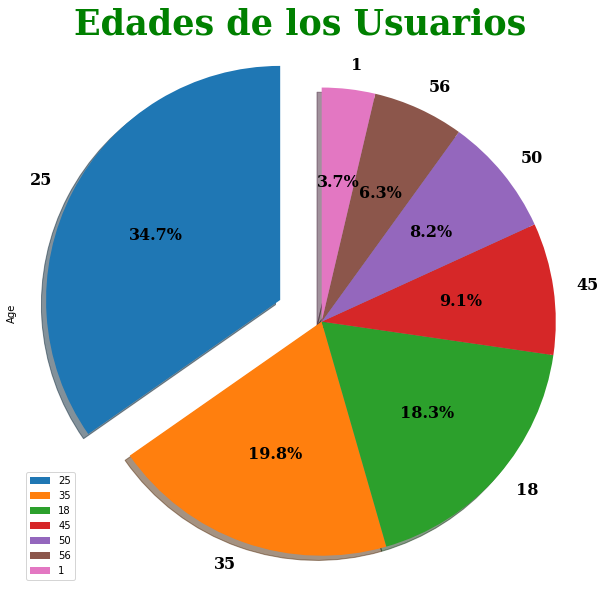

In [34]:
plt.figure(figsize=(10,10))
explode = (0.2,0,0,0,0,0,0.)
data_user_copy["Age"].value_counts().plot(kind="pie",autopct="%1.1f%%",shadow=True,explode=explode,startangle=90,textprops=dict(fontPie))
plt.axis('equal')

plt.title("Edades de los Usuarios",font)
plt.legend()


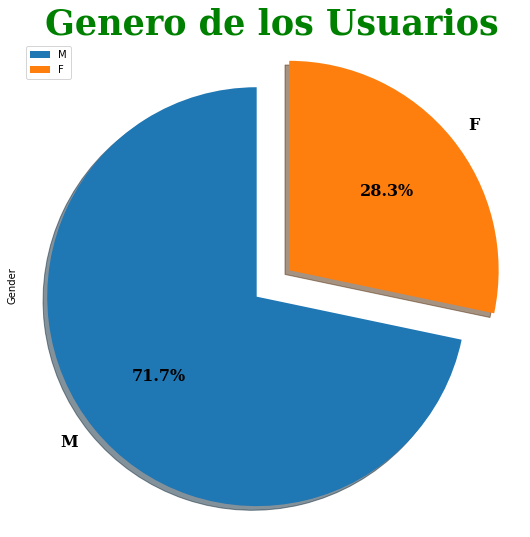

In [35]:
plt.figure(figsize=(9,9))

explode = (0.2,0)

data_user_copy["Gender"].value_counts().plot(kind="pie",autopct="%1.1f%%",shadow=True,explode=explode,startangle=90,textprops=dict(fontPie))
plt.axis('equal')

plt.title("Genero de los Usuarios",font)
plt.legend()

UserID::MovieID::Rating::Timestamp

- UserIDs range between 1 and 6040 
- MovieIDs range between 1 and 3952
- Ratings are made on a 5-star scale (whole-star ratings only)
- Timestamp is represented in seconds since the epoch as returned by time(2)
- Each user has at least 20 ratings

User information is in the file "users.dat" and is in the following
format:

UserID::Gender::Age::Occupation::Zip-code

All demographic information is provided voluntarily by the users and is
not checked for accuracy.  Only users who have provided some demographic
information are included in this data set.

- Gender is denoted by a "M" for male and "F" for female
- Age is chosen from the following ranges:

	*  1:  "Under 18"
	* 18:  "18-24"
	* 25:  "25-34"
	* 35:  "35-44"
	* 45:  "45-49"
	* 50:  "50-55"
	* 56:  "56+"

In [36]:
group_ocupation_age= total_data.groupby("Age")["Ocupation"]

In [37]:
type(group_ocupation_age)

pandas.core.groupby.generic.SeriesGroupBy

In [38]:
Age_1 = total_data.groupby(["Age"]).get_group(1)
Age_18 = total_data.groupby(["Age"]).get_group(18)

In [39]:
segmentacion_edad = total_data["Age"].unique()

In [40]:
Age_1.head()

,UserID,MovieID,Ratings,Timestamp,Gender,Age,Ocupation,Zip_Code,Title,Genres
0,1,1193,5,978300760,F,1,10,48067,One Flew Over the Cuckoo's Nest (1975),Drama
6,19,1193,5,982730936,M,1,10,48073,One Flew Over the Cuckoo's Nest (1975),Drama
27,99,1193,2,982791053,F,1,10,19390,One Flew Over the Cuckoo's Nest (1975),Drama
103,349,1193,4,1007923963,M,1,10,08035,One Flew Over the Cuckoo's Nest (1975),Drama
203,719,1193,4,975527654,M,1,0,75070,One Flew Over the Cuckoo's Nest (1975),Drama


In [41]:
Age_1["Ocupation"].unique()

array([10,  0,  2, 19,  7, 14, 12, 11,  1, 17,  4,  8, 13], dtype=int64)

In [42]:
ratings_movieid= total_data.groupby(["Ratings","MovieID"])

In [43]:
ratings_movieid.first()

UserID  Timestamp Gender  Age  Ocupation Zip_Code  \
Ratings MovieID                                                      
1       1          1314  974785296      F   18          4    68154   
        2            27  978129692      M   25         11    19130   
        3           163  977322823      M   18          4    85013   
        4           155  977256575      M   35         12    07470   
        5           284  976574994      M   25         12    91910   
...                 ...        ...    ...  ...        ...      ...   
5       3948         52  977947047      M   18          4    72212   
        3949         73  981315429      M   18          4    53706   
        3950        623  993007970      M   25         17    60555   
        3951        173  979251946      M   25          0    45237   
        3952         36  978062904      M   25          3    94123   

                                              Title  \
Ratings MovieID                                       
1       1                          Toy Story (1995)   
        2                            Jumanji (1995)   
        3                   Grumpier Old Men (1995)   
        4                  Waiting to Exhale (1995)   
        5        Father of the Bride Part II (1995)   
...                                             ...   
5       3948                Meet the Parents (2000)   
        3949             Requiem for a Dream (2000)   
        3950                       Tigerland (2000)   
        3951                Two Family House (2000)   
        3952                  Contender, The (2000)   

                                       Genres  
Ratings MovieID                                
1       1         Animation|Children's|Comedy  
        2        Adventure|Children's|Fantasy  
        3                      Comedy|Romance  
        4                        Comedy|Drama  
        5                              Comedy  
...                                       ...  
5       3948                           Comedy  
        3949                            Drama  
        3950                            Drama  
        3951                            Drama  
        3952                   Drama|Thriller  

[16912 rows x 8 columns]

In [44]:
list_genres=total_data.groupby(["Genres"])

In [45]:
list_genres.first()

,UserID,MovieID,Ratings,Timestamp,Gender,Age,Ocupation,Zip_Code,Title
Genres,,,,,,,,,
Action,2,459,3,978300002,M,56,16,70072,"Getaway, The (1994)"
Action|Adventure,2,1198,4,978298124,M,56,16,70072,Raiders of the Lost Ark (1981)
Action|Adventure|Animation,21,3000,5,978139382,M,18,16,99353,"Princess Mononoke, The (Mononoke Hime) (1997)"
Action|Adventure|Animation|Children's|Fantasy,75,558,4,977852486,F,1,10,01748,"Pagemaster, The (1994)"
Action|Adventure|Animation|Horror|Sci-Fi,17,610,4,978160993,M,50,1,95350,Heavy Metal (1981)
...,...,...,...,...,...,...,...,...,...
Sci-Fi|Thriller|War,17,2287,4,978160680,M,50,1,95350,Them! (1954)
Sci-Fi|War,10,750,4,979775386,F,35,1,95370,Dr. Strangelove or: How I Learned to Stop Worr...
Thriller,1,2762,4,978302091,F,1,10,48067,"Sixth Sense, The (1999)"


In [46]:
data_to_train = total_data[["Age","Ratings","Gender","Ocupation","Zip_Code","Genres"]]

In [47]:
data_to_train.head()

,Age,Ratings,Gender,Ocupation,Zip_Code,Genres
0,1,5,F,10,48067,Drama
1,56,5,M,16,70072,Drama
2,25,4,M,12,32793,Drama
3,25,4,M,7,22903,Drama
4,50,5,M,1,95350,Drama


In [48]:
data_to_train["Gender"]=data_to_train["Gender"].map(lambda x: 1 if x=='M' else 0)

C:\Users\crist\AppData\Local\Temp/ipykernel_5524/770880562.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_to_train["Gender"]=data_to_train["Gender"].map(lambda x: 1 if x=='M' else 0)


In [49]:
data_to_train.head()

,Age,Ratings,Gender,Ocupation,Zip_Code,Genres
0,1,5,0,10,48067,Drama
1,56,5,1,16,70072,Drama
2,25,4,1,12,32793,Drama
3,25,4,1,7,22903,Drama
4,50,5,1,1,95350,Drama


**Conclusiones Importantes**

Las variables con gran contenido de segmentacion son:
- Age
- Ratings
- Gender
- Ocupation
- Zip_Code

**K-MEANS**

In [50]:
data_to_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000209 entries, 0 to 1000208
Data columns (total 6 columns):
 #   Column     Non-Null Count    Dtype 
---  ------     --------------    ----- 
 0   Age        1000209 non-null  int64 
 1   Ratings    1000209 non-null  int64 
 2   Gender     1000209 non-null  int64 
 3   Ocupation  1000209 non-null  int64 
 4   Zip_Code   1000209 non-null  object
 5   Genres     1000209 non-null  object
dtypes: int64(4), object(2)
memory usage: 53.4+ MB


In [51]:
type(data_to_train.at[0,"Zip_Code"])

str

***OBJETIVO***<br>
* Con el proposito de generar valores apropiados, se realizara un muestreo de generos unicos para poder crear tablas y binarizar cada valor. Con ello se logra mas precisión en el entrenamiento del modelo

In [52]:
len(data_to_train["Genres"].unique())

301

In [53]:
#vector_numbers = np.arange(0,301,1)
#vector_unique_values_genres = data_to_train["Genres"].unique()
#len(vector_unique_values_genres)

In [54]:
#vector_unique_values_genres

In [55]:
unique_vGenres = []
for i in data_to_train["Genres"]:
    unique_vGenres.append(i.split("|"))

In [56]:
len(unique_vGenres)

1000209

<p>Valores separados por comas, estos valores representan el genero de cada fila.
</p>
<h3>RETO</h3>
<p>Encontrar valores unicos y clasificarlos de forma binaria para poderlos normalizar y encontrar un patron definido por perlicula, una tendencia de usuarios.</p>

In [57]:
#df_aux = pd.DataFrame(unique_vGenres)
#df_aux.head()

In [58]:
valuesUniquesGenres = []
for i,value in enumerate(unique_vGenres):
    for j in range(len(unique_vGenres[i])):
        valuesUniquesGenres.append(unique_vGenres[i][j])

In [59]:
df_uniquesGenres=pd.DataFrame(valuesUniquesGenres)

In [60]:
df_uniquesGenres.head()

,0
0,Drama
1,Drama
2,Drama
3,Drama
4,Drama


In [61]:
df_unique_vGenres_total = df_uniquesGenres[0].unique()

In [62]:
len(df_unique_vGenres_total)

18

In [63]:
type(list(df_unique_vGenres_total))

list

<h3>Nota:</h3>
<p>Al tener valores unicos puedo generar valores claficatorios para el dataframe, es decir llenar campos de 1 y 0 para poder visualizar una tendencia y seguido ello agrupar valores por edad, genero, region etc</p>

In [64]:
print(df_unique_vGenres_total)
len(df_unique_vGenres_total)

['Drama' 'Animation' "Children's" 'Musical' 'Romance' 'Comedy' 'Action'
 'Adventure' 'Fantasy' 'Sci-Fi' 'War' 'Thriller' 'Crime' 'Mystery'
 'Western' 'Horror' 'Film-Noir' 'Documentary']


18

In [65]:
df_genres_movies = pd.DataFrame(columns=[df_unique_vGenres_total])

In [66]:
len(df_genres_movies.columns)

18

In [67]:
df_genres_movies.head()

,Drama,Animation,Children's,Musical,Romance,Comedy,Action,Adventure,Fantasy,Sci-Fi,War,Thriller,Crime,Mystery,Western,Horror,Film-Noir,Documentary


<h3>CODIFICACION PARA LOS DATOS DEL DATAFRAME</h3>

In [68]:
values_dataframe_rows = []

list_unique_genres = list(df_unique_vGenres_total)

for i,lista_aux in tqdm(enumerate(unique_vGenres)):
    values_aux_dataframe_rows = np.zeros(len(df_genres_movies.columns))
    for j in lista_aux:
        for k,vListUnique in enumerate(list_unique_genres):
            if(j==vListUnique):
                values_aux_dataframe_rows[k]=1
    values_dataframe_rows.append(values_aux_dataframe_rows)  

1000209it [00:12, 77978.88it/s]


In [69]:
len(values_dataframe_rows[10000])

18

In [70]:
unique_vGenres[10000]

['Comedy', 'Drama']

In [71]:
df_genres_movies = pd.DataFrame(values_dataframe_rows,columns=list(df_unique_vGenres_total),dtype="int8")

In [72]:
df_genres_movies.head(10)

,Drama,Animation,Children's,Musical,Romance,Comedy,Action,Adventure,Fantasy,Sci-Fi,War,Thriller,Crime,Mystery,Western,Horror,Film-Noir,Documentary
0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
5,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
7,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
8,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
9,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


In [73]:
df_genres_movies.tail(10)

,Drama,Animation,Children's,Musical,Romance,Comedy,Action,Adventure,Fantasy,Sci-Fi,War,Thriller,Crime,Mystery,Western,Horror,Film-Noir,Documentary
1000199,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1000200,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
1000201,0,0,0,0,0,0,1,0,0,1,0,1,0,0,0,0,0,0
1000202,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
1000203,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1000204,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
1000205,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1000206,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1000207,1,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0
1000208,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1


In [74]:
len(df_genres_movies)

1000209

In [75]:
df_genres_movies.describe()

,Drama,Animation,Children's,Musical,Romance,Comedy,Action,Adventure,Fantasy,Sci-Fi,War,Thriller,Crime,Mystery,Western,Horror,Film-Noir,Documentary
count,1.000209e+06,1.000209e+06,1.000209e+06,1.000209e+06,1.000209e+06,1.000209e+06,1.000209e+06,1.000209e+06,1.000209e+06,1.000209e+06,1.000209e+06,1.000209e+06,1.000209e+06,1.000209e+06,1.000209e+06,1.000209e+06,1.000209e+06,1.000209e+06
mean,3.544549e-01,4.328395e-02,7.217092e-02,4.152432e-02,1.474922e-01,3.565055e-01,2.574032e-01,1.339250e-01,3.629341e-02,1.572611e-01,6.851268e-02,1.896404e-01,7.952438e-02,4.016960e-02,2.067868e-02,7.637004e-02,1.825718e-02,7.908347e-03
std,4.783481e-01,2.034957e-01,2.587708e-01,1.994996e-01,3.545960e-01,4.789672e-01,4.372036e-01,3.405719e-01,1.870194e-01,3.640470e-01,2.526237e-01,3.920166e-01,2.705556e-01,1.963569e-01,1.423063e-01,2.655894e-01,1.338801e-01,8.857659e-02
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
75%,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
max,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00


In [76]:
df_genres_movies["Ratings"]= data_to_train["Ratings"]
df_genres_movies["Age"]= data_to_train["Age"]
df_genres_movies["Gender"]= data_to_train["Gender"]


In [77]:
df_genres_movies.head()

,Drama,Animation,Children's,Musical,Romance,Comedy,Action,Adventure,Fantasy,Sci-Fi,...,Thriller,Crime,Mystery,Western,Horror,Film-Noir,Documentary,Ratings,Age,Gender
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,5,1,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,5,56,1
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,4,25,1
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,4,25,1
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,5,50,1


In [78]:
df_genres_movies.describe()

,Drama,Animation,Children's,Musical,Romance,Comedy,Action,Adventure,Fantasy,Sci-Fi,...,Thriller,Crime,Mystery,Western,Horror,Film-Noir,Documentary,Ratings,Age,Gender
count,1.000209e+06,1.000209e+06,1.000209e+06,1.000209e+06,1.000209e+06,1.000209e+06,1.000209e+06,1.000209e+06,1.000209e+06,1.000209e+06,...,1.000209e+06,1.000209e+06,1.000209e+06,1.000209e+06,1.000209e+06,1.000209e+06,1.000209e+06,1.000209e+06,1.000209e+06,1.000209e+06
mean,3.544549e-01,4.328395e-02,7.217092e-02,4.152432e-02,1.474922e-01,3.565055e-01,2.574032e-01,1.339250e-01,3.629341e-02,1.572611e-01,...,1.896404e-01,7.952438e-02,4.016960e-02,2.067868e-02,7.637004e-02,1.825718e-02,7.908347e-03,3.581564e+00,2.973831e+01,7.536115e-01
std,4.783481e-01,2.034957e-01,2.587708e-01,1.994996e-01,3.545960e-01,4.789672e-01,4.372036e-01,3.405719e-01,1.870194e-01,3.640470e-01,...,3.920166e-01,2.705556e-01,1.963569e-01,1.423063e-01,2.655894e-01,1.338801e-01,8.857659e-02,1.117102e+00,1.175198e+01,4.309076e-01
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00
25%,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.000000e+00,2.500000e+01,1.000000e+00
50%,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e+00,2.500000e+01,1.000000e+00
75%,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,...,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.000000e+00,3.500000e+01,1.000000e+00
max,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,...,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,5.000000e+00,5.600000e+01,1.000000e+00


In [79]:
df_copy = df_genres_movies

In [80]:
df_copy.set_index("Age")

,Drama,Animation,Children's,Musical,Romance,Comedy,Action,Adventure,Fantasy,Sci-Fi,War,Thriller,Crime,Mystery,Western,Horror,Film-Noir,Documentary,Ratings,Gender
Age,,,,,,,,,,,,,,,,,,,,
1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,0
56,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,1
25,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,1
25,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,4,1
50,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,5,1
35,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,3,1
18,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1


In [81]:
strarray= ['Drama','Animation',"Children's",'Musical','Romance','Comedy','Action','Adventure','Fantasy','Sci-Fi','War','Thriller','Crime','Mystery',
 'Western','Horror','Film-Noir','Documentary']

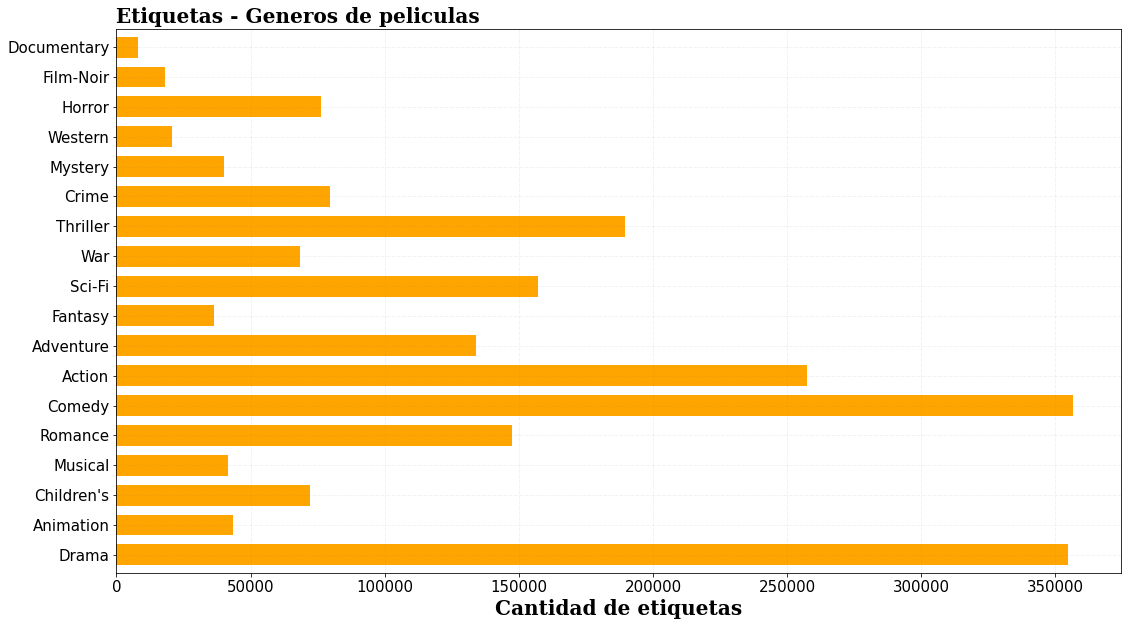

In [82]:

plt.figure(figsize=(18,10))
df_genres_movies[strarray].sum().plot.barh(width=0.7,color="orange")
plt.xticks(fontsize=15,color='black')
plt.yticks(fontsize=15,color='black')
plt.title('Etiquetas - Generos de peliculas',fontLabel_bar,loc='left')
plt.xlabel("Cantidad de etiquetas",fontLabel_bar)

plt.grid(visible = True, color ='grey',linestyle ='-.', linewidth = 0.5,alpha = 0.2)

<h3>Normalizacion Datos Finales</h3>
Recopilar Almacenar y Filtrar

In [83]:
strarray= ['Drama','Animation',"Children's",'Musical','Romance','Comedy','Action','Adventure','Fantasy','Sci-Fi','War','Thriller','Crime','Mystery',
 'Western','Horror','Film-Noir','Documentary']

gkk_plt = df_genres_movies.groupby('Age')[strarray].sum()


In [84]:
gkk_plt

,Drama,Animation,Children's,Musical,Romance,Comedy,Action,Adventure,Fantasy,Sci-Fi,War,Thriller,Crime,Mystery,Western,Horror,Film-Noir,Documentary
Age,,,,,,,,,,,,,,,,,,
1,7483.0,2449.0,4337.0,1647.0,3599.0,11162.0,6578.0,3998.0,1360.0,4178.0,1578.0,4824.0,1701.0,920.0,335.0,2211.0,330.0,130.0
18,58104.0,10269.0,16924.0,7555.0,25656.0,69980.0,50186.0,26324.0,7875.0,29033.0,10874.0,35877.0,15373.0,6401.0,2863.0,15184.0,2280.0,1081.0
25,138695.0,16454.0,25743.0,14705.0,58003.0,143210.0,105678.0,52633.0,14290.0,63156.0,24830.0,77429.0,33030.0,15160.0,7053.0,31235.0,6539.0,3489.0
35,71590.0,8117.0,14004.0,8746.0,29330.0,69244.0,50503.0,26682.0,7006.0,32333.0,14514.0,36840.0,14895.0,8179.0,4546.0,15122.0,4175.0,1708.0
45,32141.0,2889.0,5400.0,3898.0,13283.0,27890.0,19357.0,10738.0,2695.0,13040.0,6642.0,14933.0,6048.0,3851.0,2133.0,6192.0,1860.0,687.0
50,29247.0,2032.0,3890.0,3093.0,11373.0,23133.0,17012.0,9090.0,2127.0,10674.0,6314.0,13240.0,5520.0,3520.0,2420.0,4681.0,1870.0,555.0
56,17269.0,1083.0,1888.0,1889.0,6279.0,11961.0,8143.0,4488.0,948.0,4880.0,3775.0,6537.0,2974.0,2147.0,1333.0,1761.0,1207.0,260.0


In [85]:
gkk_plt = gkk_plt.to_dict()

In [86]:
list(gkk_plt["Drama"])

[1, 18, 25, 35, 45, 50, 56]

In [87]:
gkk_plt["Drama"].keys()

dict_keys([1, 18, 25, 35, 45, 50, 56])

In [88]:
gkk_plt["Drama"].values()

dict_values([7483.0, 58104.0, 138695.0, 71590.0, 32141.0, 29247.0, 17269.0])

In [89]:
keys = list(gkk_plt["Drama"].keys())
drama = list(gkk_plt["Drama"].values())
Animation = list(gkk_plt["Animation"].values())
Children = list(gkk_plt["Children's"].values())
Musical = list(gkk_plt["Musical"].values())
Romance = list(gkk_plt["Romance"].values())
Comedy= list(gkk_plt["Comedy"].values())
Action= list(gkk_plt["Action"].values())
Adventure=list(gkk_plt["Adventure"].values())
Fantasy=list(gkk_plt["Fantasy"].values())
Scifi=list(gkk_plt["Sci-Fi"].values())
War=list(gkk_plt["War"].values())
Thriller=list(gkk_plt["Thriller"].values())
Crime= list(gkk_plt["Crime"].values())
Mystery=list(gkk_plt["Mystery"].values())
Western= list(gkk_plt["Western"].values())
Horror= list(gkk_plt["Horror"].values())
FilmNoir= list(gkk_plt["Film-Noir"].values())
Documentary= list(gkk_plt["Documentary"].values())

In [90]:
keys = [str(i) for i in keys]

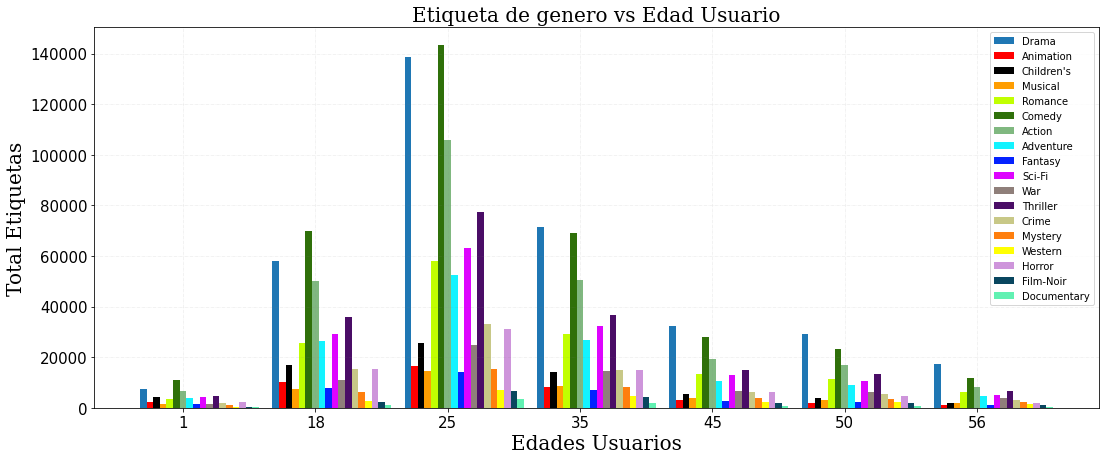

In [91]:


plt.figure(figsize=(18,7))

N = len(keys)
ind = np.arange(N) 
width = 0.1/2
  
bar1 = plt.bar(ind, drama, width)  
bar2 = plt.bar(ind+width, Animation, width,color="#FF0000")  
bar3 = plt.bar(ind+width*2, Children, width, color="#000000")
bar4 = plt.bar(ind+width*3, Musical, width, color="#FF9E02")  
bar5 = plt.bar(ind+width*4, Romance, width, color="#C1FF01")

bar6 = plt.bar(ind+width*5, Comedy, width, color="#2F700A")
bar7 = plt.bar(ind+width*6, Action, width, color="#80B880")  
bar8 = plt.bar(ind+width*7, Adventure, width, color="#13F3FF")
  
bar9 = plt.bar(ind+width*8, Fantasy, width, color="#0422FF")
bar10 = plt.bar(ind+width*9, Scifi, width, color="#DE04FF")  
bar11 = plt.bar(ind+width*10, War, width, color="#8F7F7A")

bar12 = plt.bar(ind+width*11, Thriller, width, color="#4A0D66")
bar13 = plt.bar(ind+width*12, Crime, width, color="#C8C887")  
bar14 = plt.bar(ind+width*13, Mystery, width)

bar15 = plt.bar(ind+width*14, Western, width, color="#FFFF02")

bar16 = plt.bar(ind+width*15, Horror, width, color="#CE95DB")
bar17 = plt.bar(ind+width*16, FilmNoir, width, color="#09465F")  
bar18 = plt.bar(ind+width*17, Documentary, width, color="#61F1B2")
    
plt.xlabel("Edades Usuarios",fontLabel)
plt.ylabel('Total Etiquetas',fontLabel)
plt.title("Etiqueta de genero vs Edad Usuario",fontLabel)
  
plt.xticks(ind+6*width,keys,fontsize=15,color='black')
plt.yticks(fontsize=15,color='black')
plt.legend( (bar1, bar2, bar3,bar4,bar5,bar6,bar7,bar8,bar9, bar10, bar11,bar12,bar13,bar14,bar15,bar16,bar17,bar18), (strarray) )
plt.grid(visible = True, color ='grey',linestyle ='-.', linewidth = 0.5,alpha = 0.2)


In [92]:
df_genres_movies

,Drama,Animation,Children's,Musical,Romance,Comedy,Action,Adventure,Fantasy,Sci-Fi,...,Thriller,Crime,Mystery,Western,Horror,Film-Noir,Documentary,Ratings,Age,Gender
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,5,1,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,5,56,1
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,4,25,1
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,4,25,1
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,5,50,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1000204,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,5,18,1
1000205,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,3,35,1
1000206,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,18,1
1000207,1,0,0,0,0,1,0,0,0,0,...,0,0,0,1,0,0,0,5,18,0


In [93]:
genres_copy = df_genres_movies[strarray]

In [94]:
gkk_animation = df_genres_movies.groupby(["Age","Ratings"])["Animation"].sum()

In [95]:
#gkk_animation

<AxesSubplot:xlabel='Age,Ratings'>

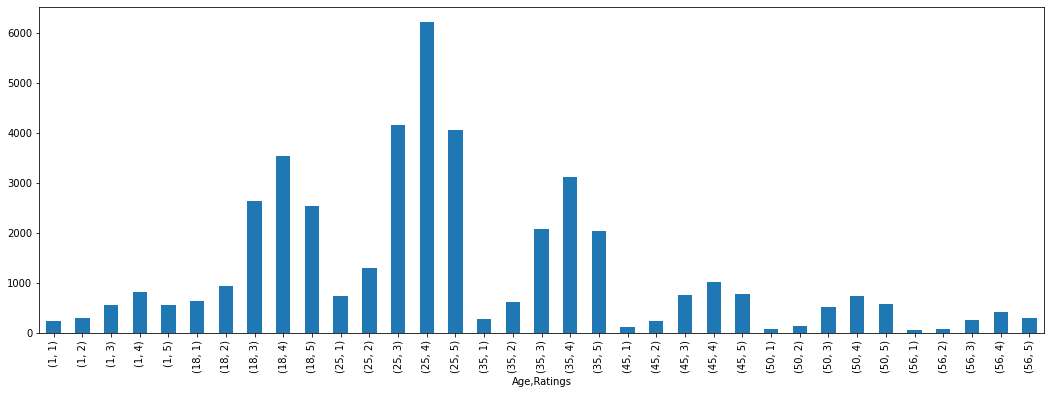

In [96]:
plt.figure(figsize=(18,6))
gkk_animation.plot.bar()

In [97]:
gkk_children = df_genres_movies.groupby(["Age","Ratings"])["Children's"].sum()

In [98]:
#gkk_children

<AxesSubplot:xlabel='Age,Ratings'>

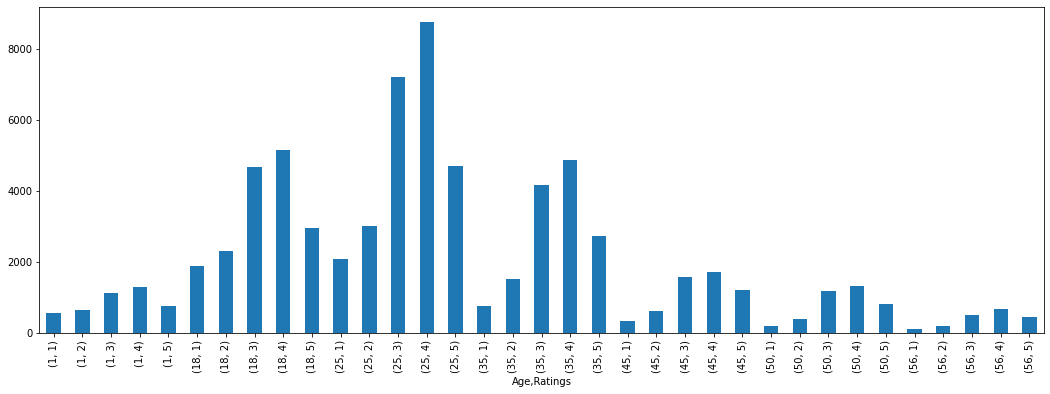

In [99]:
plt.figure(figsize=(18,6))
gkk_children.plot.bar()

In [100]:
gkk_musical = df_genres_movies.groupby(["Age","Ratings"]).sum()["Musical"]
#gkk_musical

<AxesSubplot:xlabel='Age,Ratings'>

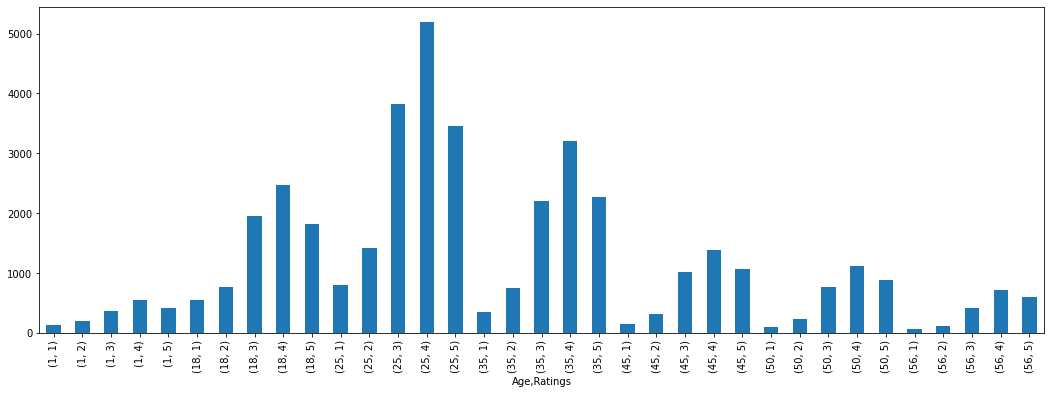

In [101]:
plt.figure(figsize=(18,6))
gkk_musical.plot.bar()

In [102]:
gkk_horror = df_genres_movies.groupby(["Age","Ratings"]).sum()["Horror"]

<AxesSubplot:xlabel='Age,Ratings'>

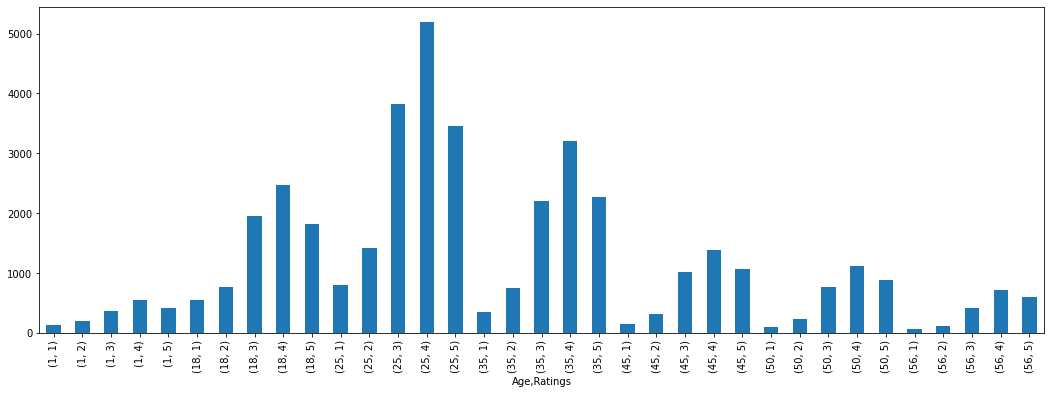

In [103]:
plt.figure(figsize=(18,6))
gkk_musical.plot.bar()

In [104]:
gkk_action= df_genres_movies[["Age","Ratings"]].groupby("Age").count().reset_index()
gkk_action.columns=["Age","Ratings"]
gkk_action.head()

,Age,Ratings
0,1,27211
1,18,183536
2,25,395556
3,35,199003
4,45,83633


<AxesSubplot:>

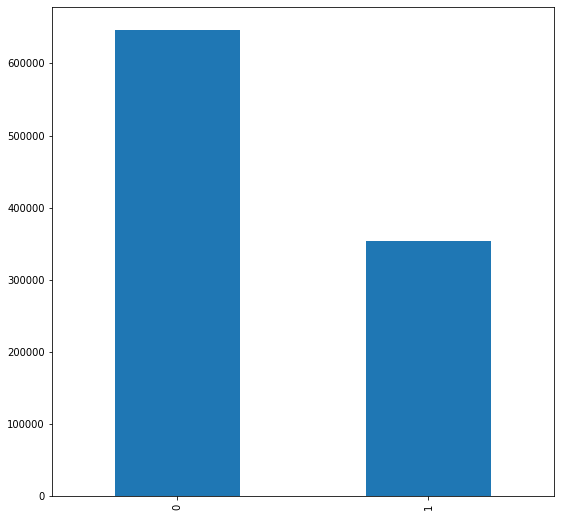

In [105]:
plt.figure(figsize=(9,9))
df_genres_movies["Drama"].value_counts().plot(kind="bar")

**CONCLUSIONES**
* El dataset cuenta con 18 generos de peliculas diferentes.

---
<h1>Revisar</h1>


aux_vector=[]
for i,v1 in tqdm(enumerate(data_to_train["Genres"])):
  for j,v2 in enumerate(vector_unique_values_genres):
    if(v1==v2):
      aux_vector.append(vector_numbers[j])



data_to_train["Genres"]=aux_vector

data_to_train.head()

data_to_train = data_to_train.drop(columns="Zip_Code")

data_to_train.head()

k_values = list(range(1,10))
wcss_list = []
for k in tqdm(k_values):
    kmeans = KMeans(n_clusters = k)
    kmeans.fit_transform(data_to_train)
    wcss_list.append(kmeans.inertia_)

plt.plot(k_values,wcss_list)
plt.xlabel("k")
plt.ylabel("WCSS Score")
plt.title("Within Cluster Sum of Squares - by k")
plt.tight_layout()
plt.show()

kmeans = KMeans(n_clusters = 2)
kmeans.fit(data_to_train)

clusters = kmeans.labels_
DTT = data_to_train 
DTT['labels'] = clusters
fig = plt.figure(figsize=(21,10))
ax = fig.add_subplot(111, projection='3d')
ax.scatter(DTT["Age"][DTT.labels == 0], DTT["Ocupation"][DTT.labels == 0], DTT["Genres"][DTT.labels == 0], c='blue', s=60)
ax.scatter(DTT["Age"][DTT.labels == 1],DTT["Ocupation"][DTT.labels == 1], DTT["Genres"][DTT.labels == 1], c='red', s=60)
ax.scatter(DTT["Age"][DTT.labels == 2], DTT["Ocupation"][DTT.labels == 2], DTT["Genres"][DTT.labels == 2], c='yellow', s=60)
ax.view_init(30, 185)
plt.show()

---

<h1>Filtro Colaborativo</h1>

Teniendo en cuenta la teoria del filtro colaborativo, se reformula los datos de interes ya que para estos no se utilizara un algorithmo de clustering.

In [106]:
total_data.head()

,UserID,MovieID,Ratings,Timestamp,Gender,Age,Ocupation,Zip_Code,Title,Genres
0,1,1193,5,978300760,F,1,10,48067,One Flew Over the Cuckoo's Nest (1975),Drama
1,2,1193,5,978298413,M,56,16,70072,One Flew Over the Cuckoo's Nest (1975),Drama
2,12,1193,4,978220179,M,25,12,32793,One Flew Over the Cuckoo's Nest (1975),Drama
3,15,1193,4,978199279,M,25,7,22903,One Flew Over the Cuckoo's Nest (1975),Drama
4,17,1193,5,978158471,M,50,1,95350,One Flew Over the Cuckoo's Nest (1975),Drama


Como paso principal se vuelven a tener en cuenta los datos iniciales ya que para la tecnica es importante tener presente el Id de la pelicula, rating y las etiquetas correspondientes

Al utilizar otra tecnica de ML se debe realizar una nueva exploracion sobre los datos existentes y para ello se deben analizar el Id de usuarios y el Id de las peliculas que figuran como unicos, al igual se tendra en cuenta las tablas ya generadas y normalizadas como data_to_train y df_genres_movies

In [107]:
data_to_train.head()

,Age,Ratings,Gender,Ocupation,Zip_Code,Genres
0,1,5,0,10,48067,Drama
1,56,5,1,16,70072,Drama
2,25,4,1,12,32793,Drama
3,25,4,1,7,22903,Drama
4,50,5,1,1,95350,Drama


In [108]:
df_genres_movies.head()

,Drama,Animation,Children's,Musical,Romance,Comedy,Action,Adventure,Fantasy,Sci-Fi,...,Thriller,Crime,Mystery,Western,Horror,Film-Noir,Documentary,Ratings,Age,Gender
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,5,1,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,5,56,1
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,4,25,1
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,4,25,1
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,5,50,1


Basado en las tablas anteriores se creara una nueva tabla con los datos de interes para el filtro colaborativo

In [109]:
c_moviesId = total_data["MovieID"].nunique()
c_userId = total_data["UserID"].nunique()
c_ratings= len(total_data["Ratings"])
c_moviesId,c_userId, c_ratings

(3706, 6040, 1000209)

In [110]:
userFreq = total_data[["UserID","MovieID"]].groupby("UserID").count().reset_index()
userFreq.columns = ["UserID","nRatings"]
userFreq.head()
userFreq.tail()

,UserID,nRatings
6035,6036,888
6036,6037,202
6037,6038,20
6038,6039,123
6039,6040,341


In [111]:
userFreq["nRatings"].mean()

165.5975165562914

En promedio cada usuario califica 165 peliculas 

<h3>Conclusiones</h3>

<ul>
    <li> En el dataset se encuentran 3706 peliculas diferentes</li>
    <li> En el dataset se encuentran 6040 usuarios diferentes</li>
    <li> En en promedio cada usuario del dataset califica 165 peliculas</li>
</ul>

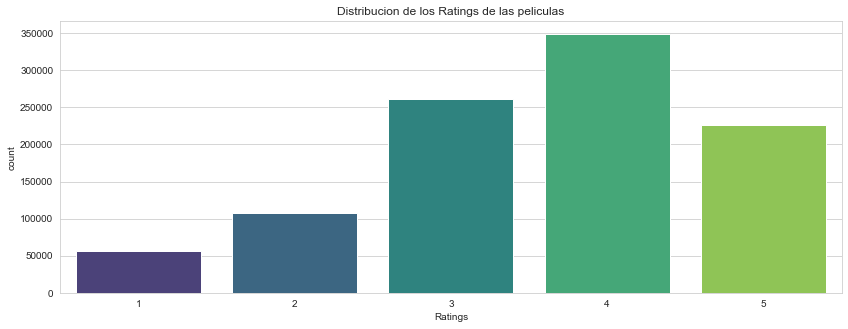

In [112]:
sns.set_style("whitegrid")
plt.figure(figsize=(14,5))
sns.countplot(x="Ratings",data=total_data,palette="viridis")
plt.title("Distribucion de los Ratings de las peliculas")
plt.show()

<h3>Conclusiones</h3>

<ul>
    <li> El Rating/calificacion mas comun es el 4</li>
    <li> El Rating/calificacion menos comun es el 1</li>
</ul>

Text(0.5, 1.0, 'Numero de peliculas calificadas por usuario')

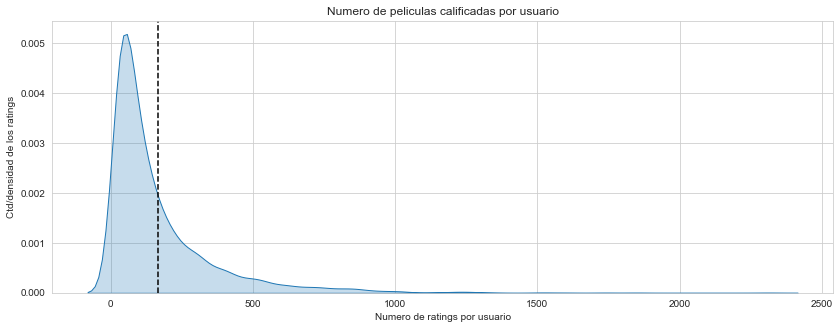

In [113]:
sns.set_style("whitegrid")
plt.figure(figsize=(14,5))

sns.kdeplot(userFreq["nRatings"],shade=True,legend=False)
plt.axvline(userFreq["nRatings"].mean(),color="k",linestyle="--")
plt.xlabel("Numero de ratings por usuario")
plt.ylabel("Ctd/densidad de los ratings")
plt.title("Numero de peliculas calificadas por usuario")

<h3>Mejor y peor valoracion por pelicula</h3>

In [114]:
meanRating = total_data.groupby("MovieID")[["Ratings"]].mean()
lw_rated = meanRating["Ratings"].idxmin()

In [115]:
meanRating.head()

,Ratings
MovieID,
1,4.146846
2,3.201141
3,3.016736
4,2.729412
5,3.006757


In [116]:
lw_rated

127

In [117]:
total_data.loc[total_data["MovieID"]==lw_rated]

,UserID,MovieID,Ratings,Timestamp,Gender,Age,Ocupation,Zip_Code,Title,Genres
1000198,5334,127,1,960795494,F,56,13,46140,"Silence of the Palace, The (Saimt el Qusur) (1...",Drama


Mejor Valoracion

In [118]:
hg_rated = meanRating["Ratings"].idxmax()
total_data.loc[total_data["MovieID"]==hg_rated]

,UserID,MovieID,Ratings,Timestamp,Gender,Age,Ocupation,Zip_Code,Title,Genres
965717,149,787,5,977325719,M,25,1,29205,"Gate of Heavenly Peace, The (1995)",Documentary
965718,2825,787,5,972610193,F,25,20,94014,"Gate of Heavenly Peace, The (1995)",Documentary
965719,2872,787,5,972423586,M,25,20,94014,"Gate of Heavenly Peace, The (1995)",Documentary


In [119]:
hg_rated

787

In [120]:
meanRating.idxmax()

Ratings    787
dtype: int64

In [121]:
type(meanRating)

pandas.core.frame.DataFrame

<h3>Conclusiones</h3>

<ul>
    <li>La pelicula con peor calificacion promedio fue Silence of the Palace</li>
    <li>La pelicula con mejor promedio de calificacion fue Gate of Heavenly peace</li>

</ul>
    

In [122]:
meanRating.Ratings.idxmax()

787

In [123]:
meanRating.tail()

,Ratings
MovieID,
3948,3.635731
3949,4.115132
3950,3.666667
3951,3.900000
3952,3.780928


In [124]:
meanRating.head(127)

,Ratings
MovieID,
1,4.146846
2,3.201141
3,3.016736
4,2.729412
5,3.006757
...,...
127,1.000000
128,4.333333
129,3.307692


In [125]:
meanRating.head(747)

,Ratings
MovieID,
1,4.146846
2,3.201141
3,3.016736
4,2.729412
5,3.006757
...,...
785,3.478431
786,3.123913
787,5.000000


In [126]:
HgRate=meanRating[meanRating["Ratings"] == 5]
listHgRate=list(HgRate.index)

In [127]:
LwRate=meanRating[meanRating["Ratings"] <= 1]
listLwRate = list(LwRate.index)
type(listLwRate)

list

In [128]:
rslt_listLw = total_data[total_data["MovieID"].isin(listLwRate)]

In [129]:
rslt_listLw.head()

,UserID,MovieID,Ratings,Timestamp,Gender,Age,Ocupation,Zip_Code,Title,Genres
907256,58,1311,1,977936528,M,25,2,30303,Santa with Muscles (1996),Comedy
907257,193,1311,1,977018841,F,45,15,44106,Santa with Muscles (1996),Comedy
907258,601,1311,1,975882621,F,18,20,06320,Santa with Muscles (1996),Comedy
907259,1478,1311,1,974752662,M,1,10,92620,Santa with Muscles (1996),Comedy
907260,1943,1311,1,993575910,M,18,4,91501,Santa with Muscles (1996),Comedy


In [130]:
rslt_listLw["Title"].unique()

array(['Santa with Muscles (1996)', 'Diebinnen (1995)',
       'Blood Spattered Bride, The (La Novia Ensangrentada) (1972)',
       'Bloody Child, The (1996)', 'Loves of Carmen, The (1948)',
       'Low Life, The (1994)', 'Venice/Venice (1992)',
       'Little Indian, Big City (Un indien dans la ville) (1994)',
       'Wirey Spindell (1999)', 'Uninvited Guest, An (2000)',
       'Torso (Corpi Presentano Tracce di Violenza Carnale) (1973)',
       'Sleepover (1995)', 'Get Over It (1996)',
       'Terror in a Texas Town (1958)', 'McCullochs, The (1975)',
       'Shadows (Cienie) (1988)', 'Windows (1980)', 'Cheetah (1989)',
       'Mutters Courage (1995)', 'Underworld (1997)',
       "Kestrel's Eye (Falkens öga) (1998)", 'Waltzes from Vienna (1933)',
       'Elstree Calling (1930)',
       'Even Dwarfs Started Small (Auch Zwerge haben klein angefangen) (1971)',
       'Fantastic Night, The (La Nuit Fantastique) (1949)',
       'Lotto Land (1995)', 'Hillbillys in a Haunted House (1967)',
 

In [131]:
rslt_listHg = total_data[total_data["MovieID"].isin(listHgRate)]

In [132]:
rslt_listHg.head()

,UserID,MovieID,Ratings,Timestamp,Gender,Age,Ocupation,Zip_Code,Title,Genres
871322,46,3280,5,977979487,M,18,19,75602,"Baby, The (1973)",Horror
965717,149,787,5,977325719,M,25,1,29205,"Gate of Heavenly Peace, The (1995)",Documentary
965718,2825,787,5,972610193,F,25,20,94014,"Gate of Heavenly Peace, The (1995)",Documentary
965719,2872,787,5,972423586,M,25,20,94014,"Gate of Heavenly Peace, The (1995)",Documentary
999933,1915,989,5,974693867,M,50,13,01938,Schlafes Bruder (Brother of Sleep) (1995),Drama


In [133]:
rslt_listHg["Title"].unique()

array(['Baby, The (1973)', 'Gate of Heavenly Peace, The (1995)',
       'Schlafes Bruder (Brother of Sleep) (1995)',
       'Follow the Bitch (1998)', 'Bittersweet Motel (2000)',
       'Smashing Time (1967)', 'Ulysses (Ulisse) (1954)', 'Lured (1947)',
       'Song of Freedom (1936)', 'One Little Indian (1973)'], dtype=object)

---

<h3>Media Bayesiana</h3>

In [134]:
movie_sts = total_data.groupby("MovieID")[["Ratings"]].agg(["count","mean"])
movie_sts

Ratings          
          count      mean
MovieID                  
1          2077  4.146846
2           701  3.201141
3           478  3.016736
4           170  2.729412
5           296  3.006757
...         ...       ...
3948        862  3.635731
3949        304  4.115132
3950         54  3.666667
3951         40  3.900000
3952        388  3.780928

[3706 rows x 2 columns]

In [135]:
movie_sts.columns=movie_sts.columns.droplevel()
movie_sts

,count,mean
MovieID,,
1,2077,4.146846
2,701,3.201141
3,478,3.016736
4,170,2.729412
5,296,3.006757
...,...,...
3948,862,3.635731
3949,304,4.115132
3950,54,3.666667


In [136]:
C = movie_sts["count"].mean()

In [137]:
m = movie_sts["mean"].mean()

<h4>Bayesian Function</h4>

$R_i = \frac{C*m+ \sum(reviews)}{C+N}$

<ul>
    <li>C = Representa la confianza</li>
    <li>N = Numero total de reviews para la pelicula n</li>
</ul>

In [138]:
def bayesian_average(rating):
    bayesianVal_avg = (C*m+rating.sum())/(C+rating.count())
    return bayesianVal_avg

In [139]:
#total_data.groupby("MovieID")["Ratings"].agg(bayesian_average).reset_index()

In [140]:
bayesianRatings_avg = total_data.groupby("MovieID")["Ratings"].agg(bayesian_average).reset_index()
bayesianRatings_avg.columns= ["MovieID","bayesian_average"]
movie_sts= movie_sts.merge(bayesianRatings_avg,on="MovieID")

In [141]:
movie_sts = movie_sts.merge(total_data[["MovieID","Title"]])


In [142]:
movie_sts.sort_values("bayesian_average",ascending=True).head()

,MovieID,count,mean,bayesian_average,Title
936921,3593,342,1.611111,2.329085,Battlefield Earth (2000)
936984,3593,342,1.611111,2.329085,Battlefield Earth (2000)
936985,3593,342,1.611111,2.329085,Battlefield Earth (2000)
936986,3593,342,1.611111,2.329085,Battlefield Earth (2000)
936987,3593,342,1.611111,2.329085,Battlefield Earth (2000)


In [143]:
movie_sts.sort_values("bayesian_average",ascending=False).head()

,MovieID,count,mean,bayesian_average,Title
84525,318,2227,4.554558,4.412347,"Shawshank Redemption, The (1994)"
85241,318,2227,4.554558,4.412347,"Shawshank Redemption, The (1994)"
85247,318,2227,4.554558,4.412347,"Shawshank Redemption, The (1994)"
85246,318,2227,4.554558,4.412347,"Shawshank Redemption, The (1994)"
85245,318,2227,4.554558,4.412347,"Shawshank Redemption, The (1994)"


In [144]:
from IPython.display import Image
Image(url= "../Datasets/ml-1m/collaborative_filt.png", width=600, height=600)

<h3>Crear Matriz de Usuario vs Peliculas</h3>

Para crear la matriz se hara uso de la libreria csr_matriz la cual me asocia posiciones de una matriz con numeros mayores a Cero, como se puede observar en el siguiente ejemplo:
Ejemplo ref: https://machinelearningmastery.com/sparse-matrices-for-machine-learning/

---

In [145]:

# dense to sparse
from scipy.sparse import csr_matrix
# create dense matrix
A = np.array([[1, 0, 0, 1, 0, 0], [0, 0, 2, 0, 0, 1], [0, 0, 0, 2, 0, 0]])
print(A)
# convert to sparse matrix (CSR method)
S = csr_matrix(A)
print(S)
# reconstruct dense matrix
B = S.todense()
print(B)


[[1 0 0 1 0 0]
 [0 0 2 0 0 1]
 [0 0 0 2 0 0]]
  (0, 0)	1
  (0, 3)	1
  (1, 2)	2
  (1, 5)	1
  (2, 3)	2
[[1 0 0 1 0 0]
 [0 0 2 0 0 1]
 [0 0 0 2 0 0]]


In [146]:
np.unique(total_data["UserID"])

array([   1,    2,    3, ..., 6038, 6039, 6040], dtype=int64)

---

In [147]:
def create_sparse_matriz(dataframe):
    nUsr_unq = dataframe["UserID"].nunique()
    nMov_unq = dataframe["MovieID"].nunique()
    usr_map = dict(zip(np.unique(dataframe["UserID"]),list(range(nUsr_unq))))
    mov_map = dict(zip(np.unique(dataframe["MovieID"]),list(range(nMov_unq))))
    
    usr_inver_map = dict(zip(list(range(nUsr_unq)),np.unique(dataframe["UserID"])))
    mov_inver_map = dict(zip(list(range(nMov_unq)),np.unique(dataframe["MovieID"])))
    
    
    usr_indx = [usr_map[i] for i in dataframe["UserID"]]
    mov_indx = [mov_map[i] for i in dataframe["MovieID"]]
    sparse_mx = csr_matrix((dataframe["Ratings"],(mov_indx,usr_indx)),shape=(nMov_unq,nUsr_unq))
    
    return sparse_mx,usr_map,mov_map,usr_inver_map,mov_inver_map
    
    

In [148]:
sparse_mx,usr_map,mov_map,usr_inver_map,mov_inver_map = create_sparse_matriz(total_data)

In [149]:
sparse_mx.shape

(3706, 6040)

In [150]:
print(sparse_mx)

  (0, 0)	5
  (0, 5)	4
  (0, 7)	4
  (0, 8)	5
  (0, 9)	5
  (0, 17)	4
  (0, 18)	5
  (0, 20)	3
  (0, 22)	4
  (0, 25)	3
  (0, 27)	3
  (0, 33)	5
  (0, 35)	5
  (0, 37)	5
  (0, 43)	5
  (0, 44)	4
  (0, 47)	4
  (0, 48)	5
  (0, 50)	5
  (0, 55)	5
  (0, 59)	4
  (0, 64)	5
  (0, 67)	3
  (0, 72)	3
  (0, 74)	5
  :	:
  (3705, 4789)	3
  (3705, 4801)	5
  (3705, 4815)	4
  (3705, 4822)	3
  (3705, 4830)	4
  (3705, 4833)	4
  (3705, 4857)	4
  (3705, 4938)	3
  (3705, 5048)	4
  (3705, 5073)	4
  (3705, 5086)	4
  (3705, 5099)	4
  (3705, 5204)	4
  (3705, 5303)	4
  (3705, 5332)	4
  (3705, 5358)	5
  (3705, 5404)	4
  (3705, 5474)	5
  (3705, 5601)	3
  (3705, 5681)	3
  (3705, 5811)	4
  (3705, 5830)	3
  (3705, 5836)	4
  (3705, 5926)	1
  (3705, 5997)	4


<h3>Save Matrix</h3>

In [151]:
from scipy.sparse import save_npz

In [152]:
save_npz("Datasets2/usr_mtx_sparce.npz",sparse_mx)

<h3>K-Nearest Neighbours</h3>
Minima distancia entre nodos

<h5>Metodos para medir distancias entre nodos mediante KNN</h5>
<ul>
    <li> Similitud del coseno</li>
    <li> Distancia Euclidiana</li>
    <li> Distancia de Manhattan </li>
    <li> Correlacion de Pearson</li>

</ul>

In [153]:
from sklearn.neighbors import NearestNeighbors

In [154]:
def knn_recomendation(movieID,sparse_mx,k,metric="cosine",show_distance=False):
    #k=Numero de recomendaciones
    
    neighboursID = []
    mov_ind = mov_map[movieID]
    mov_vector = sparse_mx[mov_ind]
    k = k + 1
    knn = NearestNeighbors(n_neighbors=k,algorithm="brute",metric=metric)
    knn.fit(sparse_mx)
    if isinstance(mov_vector,(np.ndarray)):
        mov_vector = mov_vector.reshape(1,-1)
    neighbour = knn.kneighbors(mov_vector,return_distance=show_distance)
    for i in range(0,k):
        n=neighbour.item(i)
        neighboursID.append(mov_inver_map[n])
    neighboursID.pop(0)
    return neighboursID

In [155]:
movies_titles = dict(zip(data_movie_copy["MovieID"],data_movie_copy["Title"]))
movie_id = 12
movies_recomendation_final = knn_recomendation(movie_id,sparse_mx,k=10)
movieTitle = movies_titles[movie_id]
print(f" Pelicula vista originalmente :::::::::>>>>>> {movieTitle}")
print("***************************************************************************")
print("Peliculas Recomendadas")
print("***************************************************************************")
for i in movies_recomendation_final:
    print(movies_titles[i])

 Pelicula vista originalmente :::::::::>>>>>> Dracula: Dead and Loving It (1995)
***************************************************************************
Peliculas Recomendadas
***************************************************************************
Spy Hard (1996)
Bio-Dome (1996)
Mafia! (1998)
Gremlins 2: The New Batch (1990)
Down Periscope (1996)
Tales from the Crypt Presents: Bordello of Blood (1996)
Vampires (1998)
Robin Hood: Men in Tights (1993)
American Werewolf in Paris, An (1997)
Bats (1999)


In [156]:
so = [4,4,6,2,1]

In [157]:
np.unique(so)

array([1, 2, 4, 6])

In [158]:
kData=pd.DataFrame(so)

In [159]:
kData[0].unique()

array([4, 6, 2, 1], dtype=int64)

In [160]:

# Python 3 code to demonstrate
# working of isinstance()
# with native types
 
# initializing native types
test_int = 5
test_list = [1, 2, 3]
 
# testing with isinstance
print("Is test_int integer? : " + str(isinstance(test_int, int)))
print("Is test_int string? : " + str(isinstance(test_int, str)))
print("Is test_list integer? : " + str(isinstance(test_list, int)))
print("Is test_list list? : " + str(isinstance(test_list, list)))
 
# testing with tuple
print("Is test_int integer or list or string? : "
      + str(isinstance(test_int, (list, int))))

Is test_int integer? : True
Is test_int string? : False
Is test_list integer? : False
Is test_list list? : True
Is test_int integer or list or string? : True


In [161]:
hola

NameError: name 'hola' is not defined